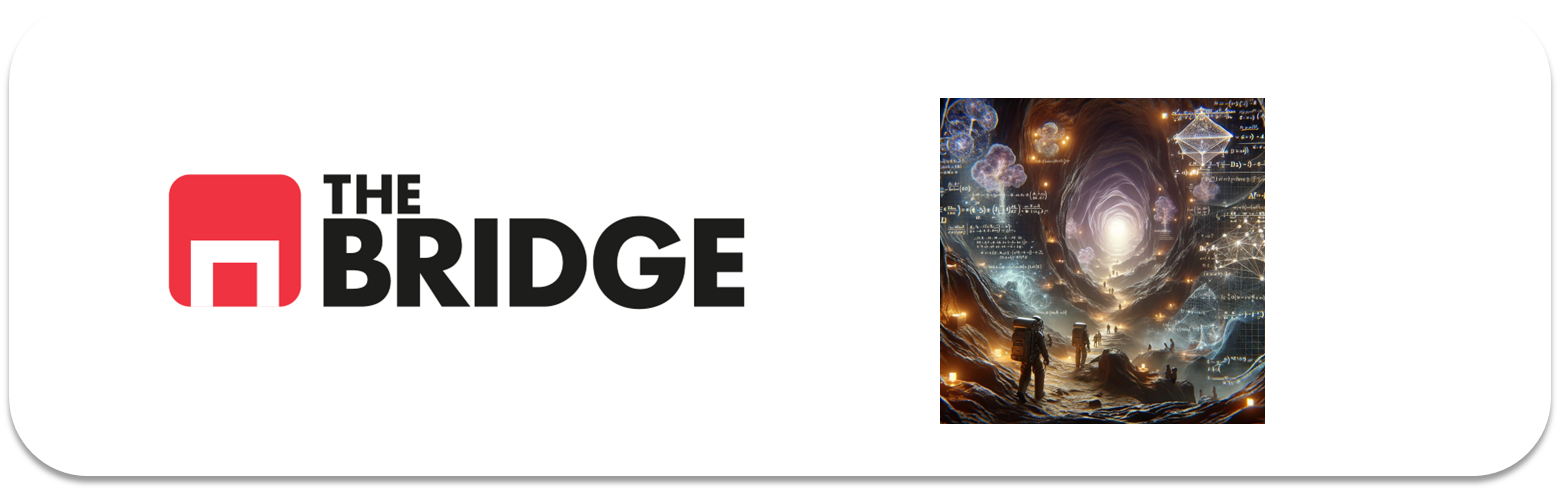

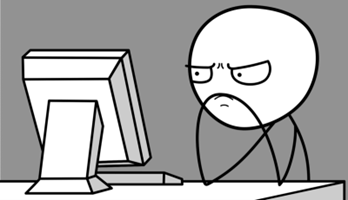

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import  train_test_split


### Ejercicios 1

Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".

In [2]:
df = pd.read_csv('./data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
import tool_box as tb

tb.describe_df(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
DATA_TYPE,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,76,12,3,4,2,3805,2,2,3,31,12,1428,36,472,34,4,2
CARDIN (%),0.68,0.11,0.03,0.04,0.02,34.09,0.02,0.02,0.03,0.28,0.11,12.79,0.32,4.23,0.3,0.04,0.02


In [5]:
df.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [26]:
df.deposit.value_counts(True)

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

In [27]:
target = 'deposit'

### Ejercicio 2

Haz el split en train y test y analiza el target.

In [29]:
train_set, test_set = train_test_split(df, random_state=42, test_size=0.2)

<Axes: xlabel='deposit', ylabel='count'>

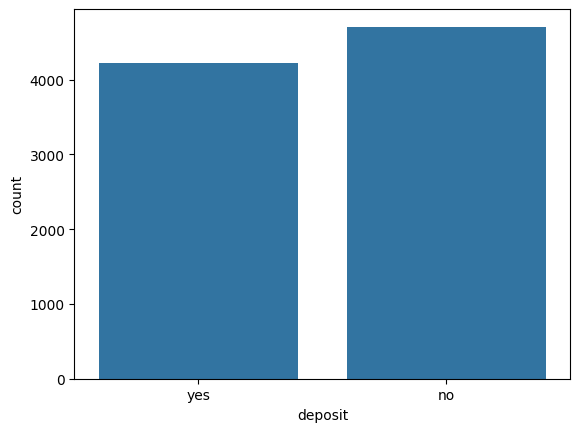

In [30]:
sns.countplot(train_set, x = 'deposit')

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

In [31]:
feat_num = train_set.describe().columns.to_list()
train_set[feat_num].describe()

,age,balance,day,duration,campaign,pdays,previous
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.242356,1520.506328,15.629970,370.224549,2.506440,50.732557,0.811289
std,11.887444,3135.126582,8.445399,345.949019,2.705238,108.640328,2.207104
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,121.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,15.000000,253.000000,2.000000,-1.000000,0.000000
75%,49.000000,1714.000000,22.000000,493.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


(7, 2)


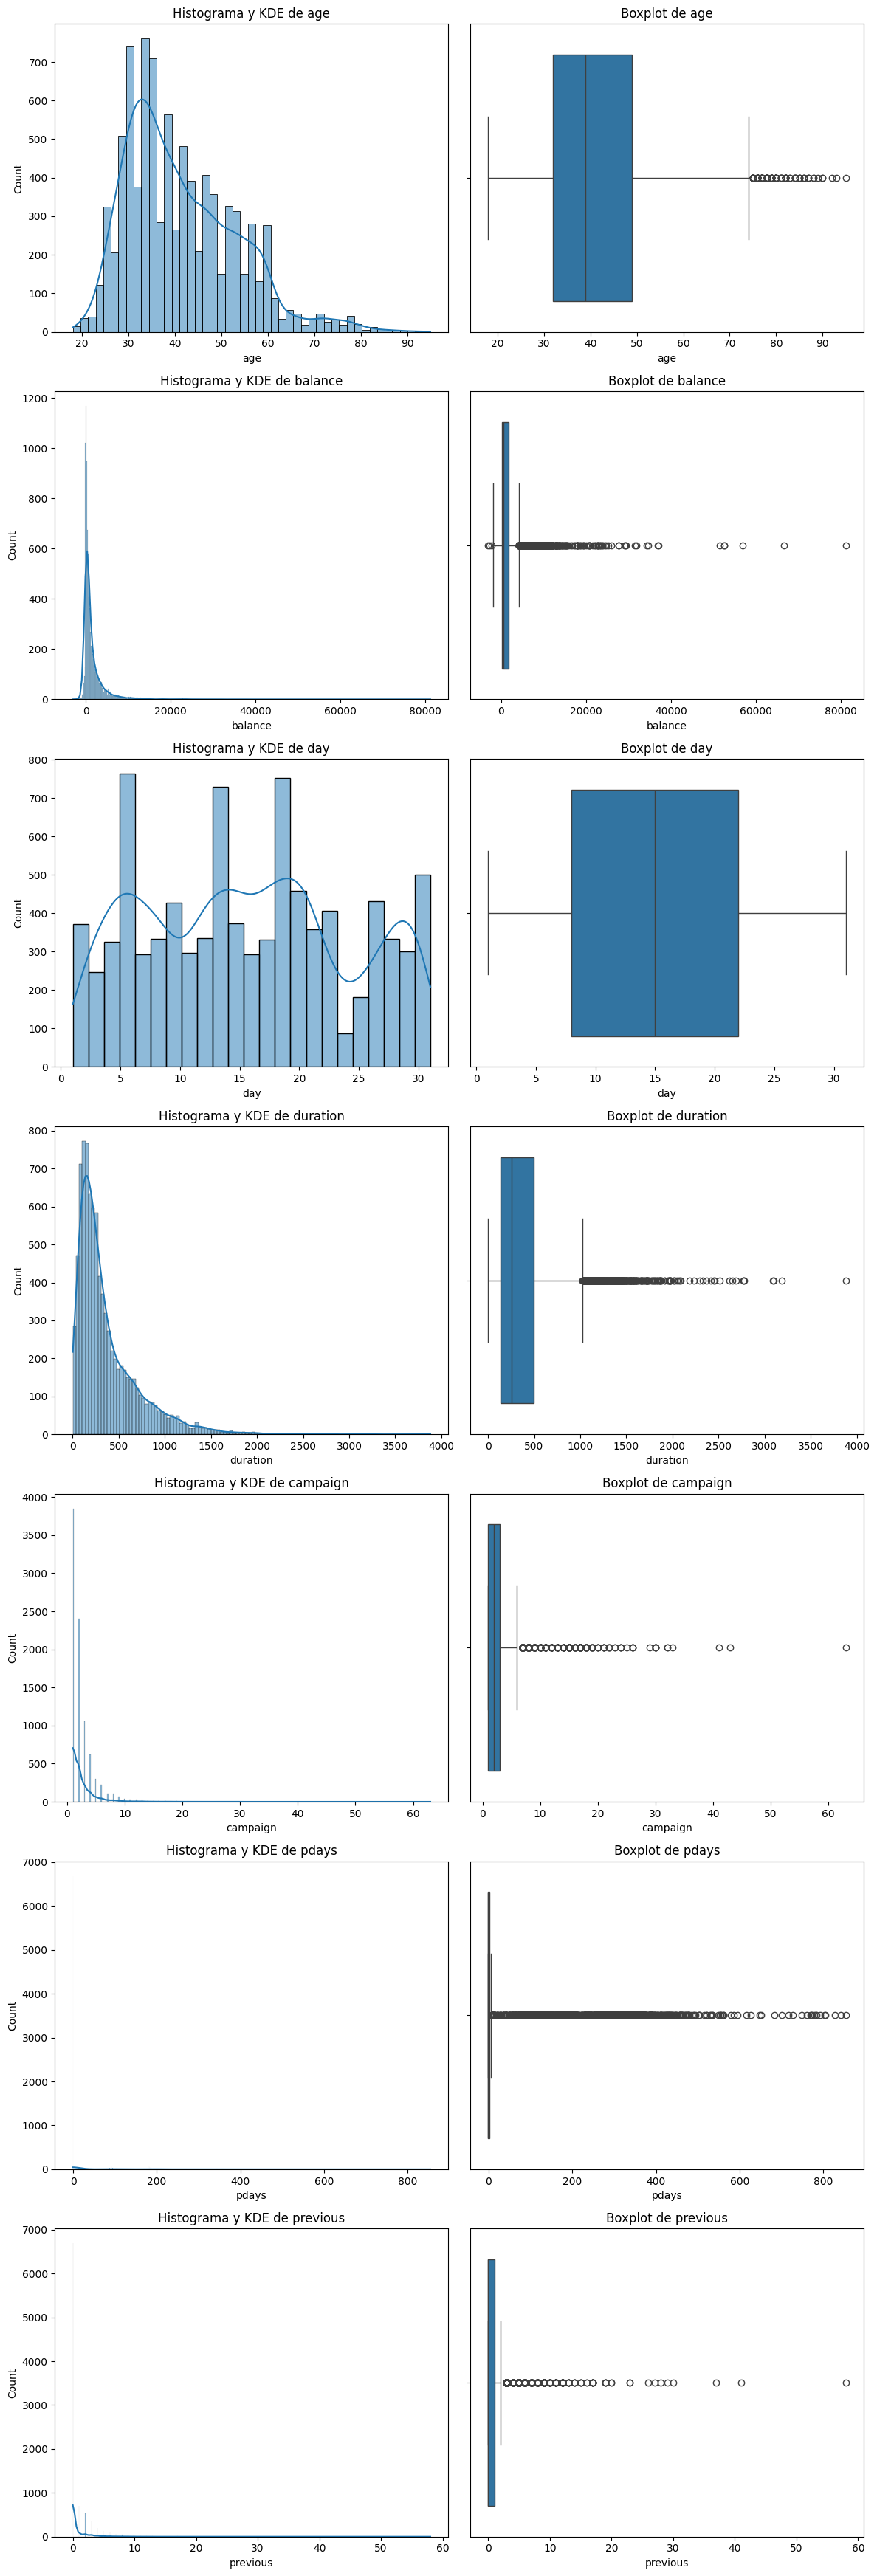

In [36]:
import bootcampviztools as btv
btv.plot_combined_graphs(train_set, [col for col in train_set[feat_num]])

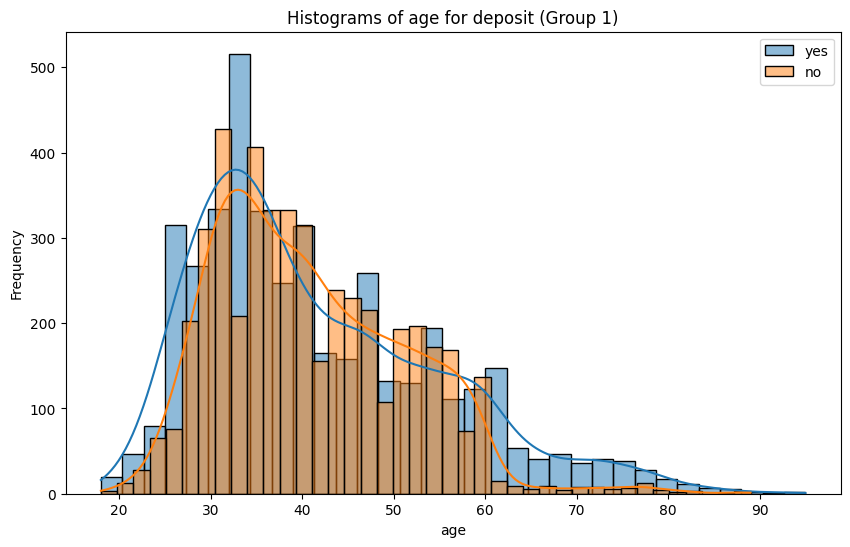

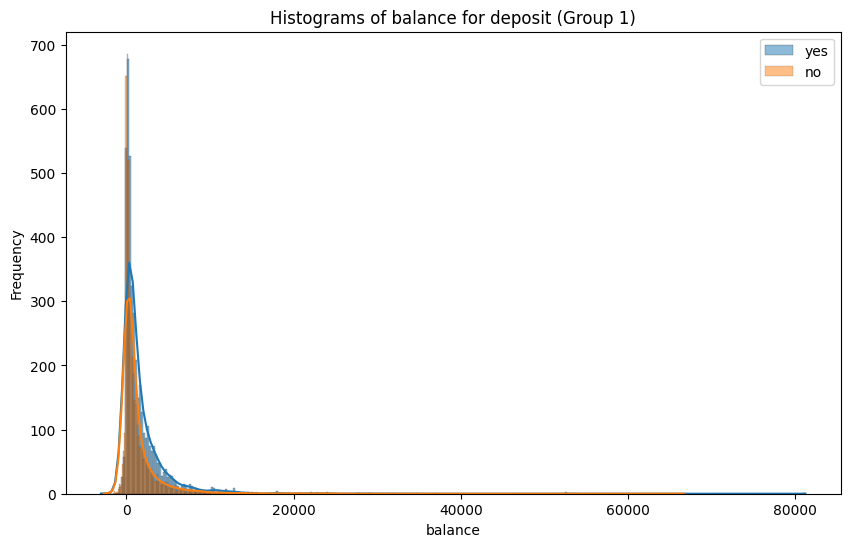

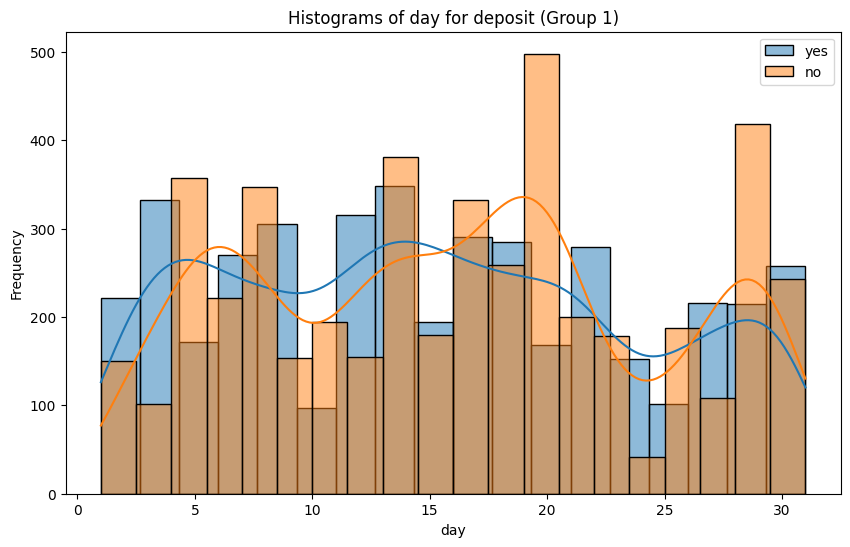

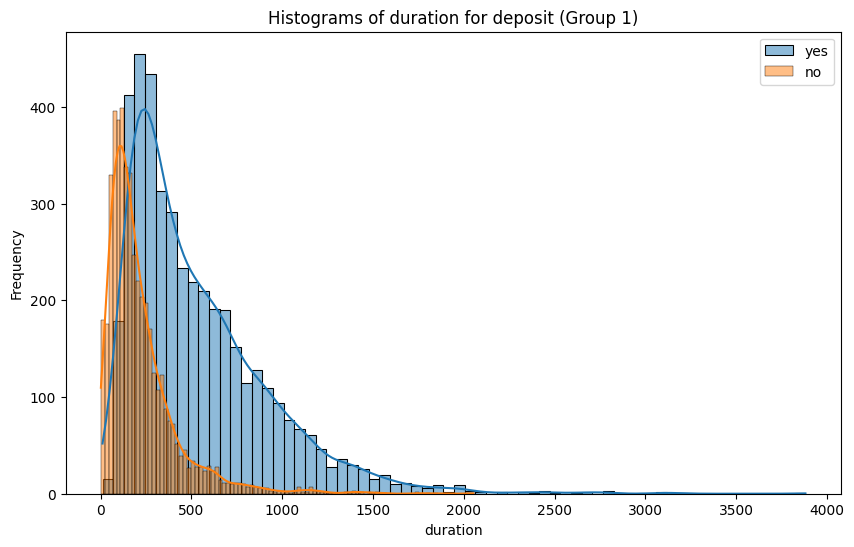

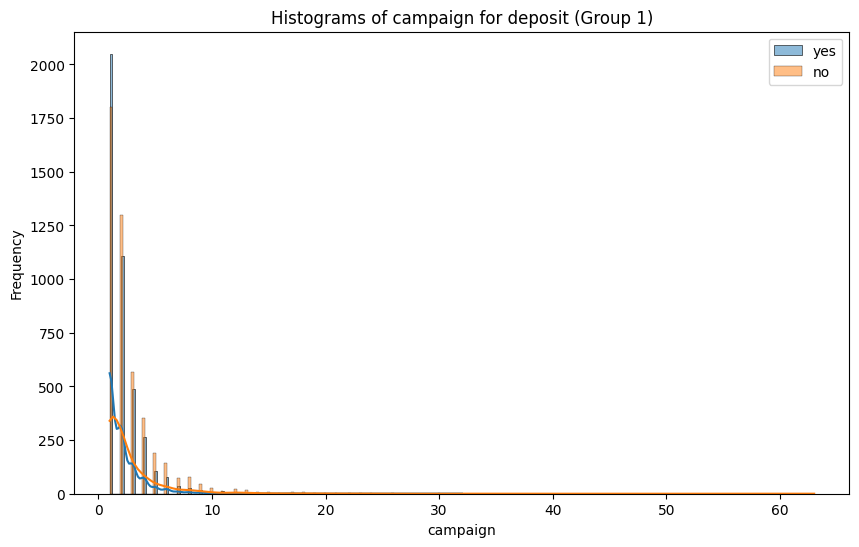

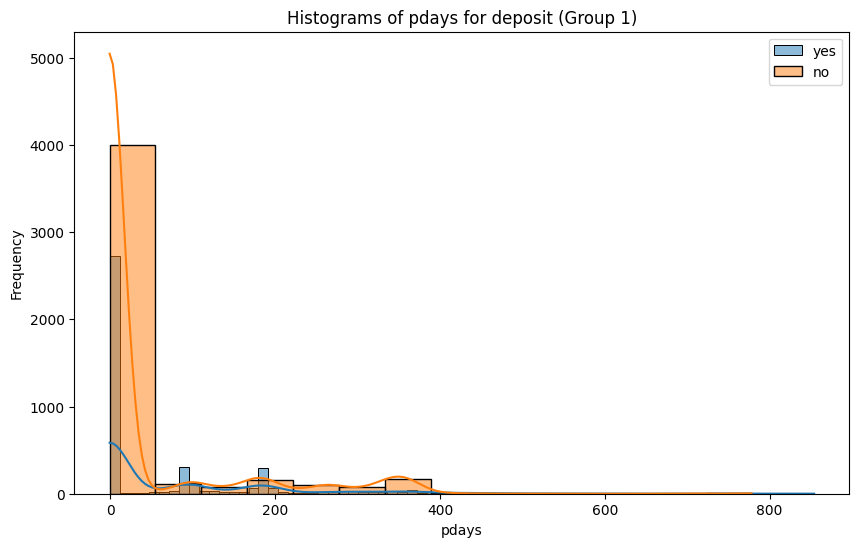

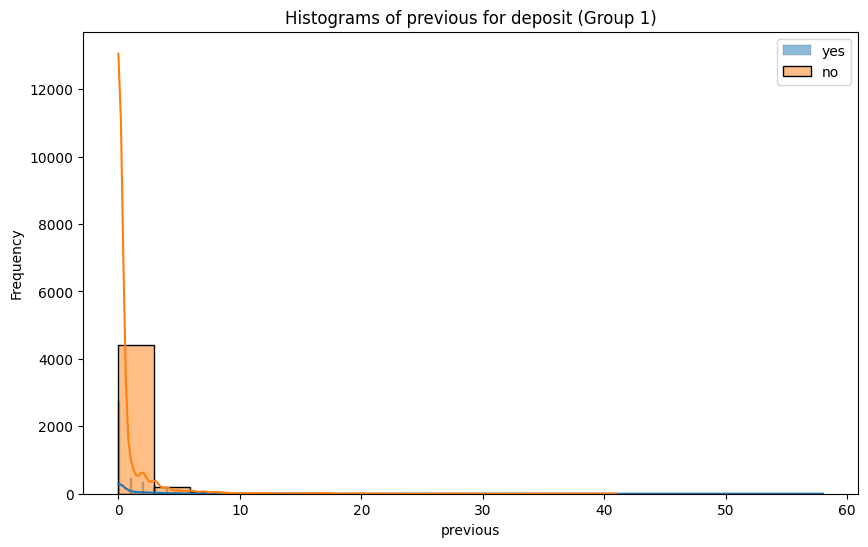

In [41]:
for col in feat_num:
    btv.plot_grouped_histograms(train_set, target, col, group_size = 2)

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
y_train = train_set['deposit']
rf_1 = RandomForestClassifier(max_depth= 10, random_state=42)

selector_model = SelectFromModel(estimator = rf_1, threshold= "median") #treshold determina las varibales que pasan al modelo
selector_model.fit(train_set[feat_num],y_train) 

X_train_model = pd.DataFrame(selector_model.transform(train_set[feat_num]), columns = selector_model.get_feature_names_out())
lista_model = X_train_model.columns.to_list()
lista_model


['age', 'balance', 'duration', 'pdays']

### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

In [43]:
X_train = train_set[lista_model]
y_train = train_set['deposit']
X_test = test_set[lista_model]
y_test = test_set['deposit']

In [44]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_scal = std.fit_transform(X_train)
X_test_scal = std.transform(X_test)

### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scal, y_train)
print(log_reg.score(X_train_scal, y_train))
print(log_reg.score(X_test_scal, y_test))

0.7375965953634226
0.7299596954769368


### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [47]:
from sklearn.neural_network import MLPClassifier 

mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(100, 100))  

mlp.fit(X_train_scal, y_train)

print(mlp.score(X_train_scal, y_train))
print(mlp.score(X_test_scal, y_test))

0.8042333967969537
0.7801164352888491


### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?